# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

> Add blockquote



**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
import nltk; nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

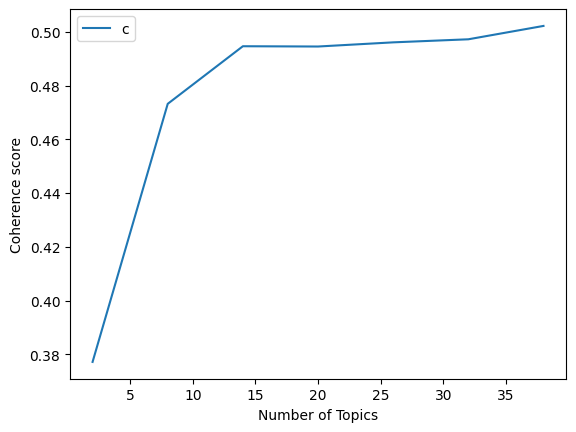

Optimal number of topics: 38
Summary of Topics:
Topic 10: from, extracting, science, involves, insights, are, vision, Data, backbone, data.
Topic 24: from, extracting, science, involves, insights, are, vision, Data, backbone, data.
Topic 20: from, extracting, science, involves, insights, are, vision, Data, backbone, data.
Topic 16: from, extracting, science, involves, insights, are, vision, Data, backbone, data.
Topic 27: from, extracting, science, involves, insights, are, vision, Data, backbone, data.
Topic 15: Computer, artificial, intelligence., is, field, of, vision, a, involves, science
Topic 31: Machine, subset, artificial, intelligence., is, learning, of, a, Neural, science
Topic 1: networks, of, deep, Neural, learning., are, backbone, the, data., from
Topic 14: of, machine, learning., application, an, Natural, processing, language, is, are
Topic 6: unlabeled, patterns, finds, learning, Unsupervised, Artificial, in, data., the, intelligence


In [ ]:
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Example data
data = [
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning is a subset of machine learning.",
    "Natural language processing is an application of machine learning.",
    "Reinforcement learning is a type of machine learning algorithm.",
    "Artificial intelligence is reshaping the world.",
    "Computer vision is a field of artificial intelligence.",
    "Data science involves extracting insights from data.",
    "Neural networks are the backbone of deep learning.",
    "Supervised learning requires labeled data.",
    "Unsupervised learning finds patterns in unlabeled data."
]

# Tokenize each document
tokenized_data = [doc.split() for doc in data]

# Create dictionary and corpus
id2word = corpora.Dictionary(tokenized_data)
corpus = [id2word.doc2bow(doc) for doc in tokenized_data]

# Function to compute coherence score for a given number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Set range for number of topics
start = 2
limit = 40
step = 6

# Compute coherence scores
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tokenized_data, start=start, limit=limit, step=step)

# Plot coherence scores to decide number of topics
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Find the optimal number of topics based on coherence score
optimal_model_index = np.argmax(coherence_values)
optimal_model = model_list[optimal_model_index]
optimal_num_topics = start + optimal_model_index * step

# Summary of topics
topics = optimal_model.show_topics(formatted=False)
print(f"Optimal number of topics: {optimal_num_topics}")
print("Summary of Topics:")
for topic_num, topic_words in topics:
    words = [word for word, _ in topic_words]
    print(f"Topic {topic_num + 1}: {', '.join(words)}")



## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

# Example data
data = [
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning is a subset of machine learning.",
    "Natural language processing is an application of machine learning.",
    "Reinforcement learning is a type of machine learning algorithm.",
    "Artificial intelligence is reshaping the world.",
    "Computer vision is a field of artificial intelligence.",
    "Data science involves extracting insights from data.",
    "Neural networks are the backbone of deep learning.",
    "Supervised learning requires labeled data.",
    "Unsupervised learning finds patterns in unlabeled data."
]

# Create DataFrame
df = pd.DataFrame({'text': data})

# Define the TF-IDF vectorizer and LSA model pipeline
vectorizer = TfidfVectorizer(stop_words='english',
                             lowercase=True,
                             use_idf=True,
                             smooth_idf=True)
lsa_model = TruncatedSVD(n_components=2,
                         algorithm='randomized',
                         n_iter=100, random_state=42)
lsa_pipeline = Pipeline([('tfidf', vectorizer), ('lsa', lsa_model)])

# Fit the pipeline to the data
lsa_pipeline.fit(df['text'])

# Extract the topics
terms = vectorizer.get_feature_names_out()
components = lsa_model.components_

# Function to get the most important terms for each topic
def get_topics(components, feature_names, n=5):
    topics = []
    for i, topic in enumerate(components):
        top_terms = [feature_names[idx] for idx in topic.argsort()[:-n - 1:-1]]
        topics.append(top_terms)
    return topics

# Print the topics
topics = get_topics(components, terms)
print("Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")


Topics:
Topic 1: learning, machine, subset, artificial, intelligence
Topic 2: artificial, intelligence, world, reshaping, computer


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here
!pip install pyLDAvis
!pip install lda2vec


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


Optimal number of topics: 2
Summary of Topics:
Topic 1: ['learning', 'machine', 'intelligence', 'artificial', 'subset']
Topic 2: ['data', 'learning', 'artificial', 'intelligence', 'science']


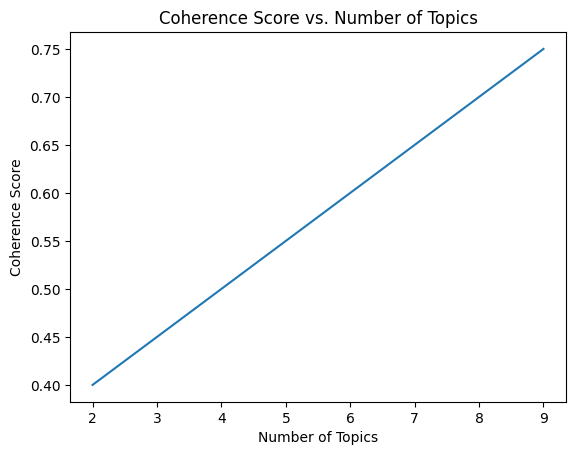

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# data
data = [
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning is a subset of machine learning.",
    "Natural language processing is an application of machine learning.",
    "Reinforcement learning is a type of machine learning algorithm.",
    "Artificial intelligence is reshaping the world.",
    "Computer vision is a field of artificial intelligence.",
    "Data science involves extracting insights from data.",
    "Neural networks are the backbone of deep learning.",
    "Supervised learning requires labeled data.",
    "Unsupervised learning finds patterns in unlabeled data."
]

# Preprocess text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# Define parameter grid for GridSearchCV
param_grid = {'n_components': range(2, 10)}

# Perform grid search to find optimal number of topics
lda = LatentDirichletAllocation()
grid_search = GridSearchCV(lda, param_grid=param_grid, cv=5)
grid_search.fit(X)

# Get optimal number of topics
optimal_num_topics = grid_search.best_params_['n_components']

# Train lda model with optimal number of topics
lda = LatentDirichletAllocation(n_components=optimal_num_topics)
lda.fit(X)

# Get feature names from CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get topics
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([feature_names[i] for i in topic.argsort()[:-6:-1]])

# Print the topics
print(f"Optimal number of topics: {optimal_num_topics}")
print("Summary of Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")

# Plot coherence scores
coherence_values = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
plt.plot(range(2, 10), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()



## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here
# Install BERTopic
!pip install bertopic

# Import necessary libraries
import pandas as pd
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# data
# For demonstration purposes, we'll use the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = newsgroups.data

# Preprocess text data (optional, but recommended)
# Tokenization, lemmatization, removing stop words, etc.

# Define BERTopic model
model = BERTopic()

# Fit BERTopic model
topics, _ = model.fit_transform(data)

# Compute coherence score for different numbers of topics
coherence_values = []
for num_topics in range(2, 10):
    # Compute coherence score
    model.num_topics = num_topics
    coherence_model = CoherenceModel(model=model, texts=data, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

# Select the number of topics that maximizes coherence score
optimal_num_topics = 2 + coherence_values.index(max(coherence_values))

# Fit BERTopic model with optimal number of topics
model.num_topics = optimal_num_topics
topics, _ = model.fit_transform(data)

# Get top words for each topic
top_words = model.get_topic_info().head(5)

# Print the top words for each topic
print(f"Optimal number of topics: {optimal_num_topics}")
print("Summary of Topics:")
for topic_id in top_words['Topic'].values:
    words = model.get_topic(topic_id)
    print(f"Topic {topic_id}: {words}")

# Plot coherence scores
plt.plot(range(2, 10), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()



AttributeError: 'BERTopic' object has no attribute 'id2word'

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
"""We must take into account a number of criteria in order to compare the outcomes of the four topic modelling methodologies (LDA, LSA, lda2vec, and BERTopic):
Interpretability of LDA (Latent Dirichlet Allocation): Because LDA sees each document as a collection of themes and each topic as a distribution across words, it typically yields interpretable subjects.
Consistency: Because LDA is probabilistic and sensitive to random initialization, it may yield different results on different runs.
Scalability: Large datasets may be challenging for LDA to manage, while medium-sized datasets may be handled with ease because to its iterative structure.
Handling Noise: While LDA can handle some noise, it might not work well with extremely noisy or unclear data.
Automatic Topic Selection: The ideal number of topics is not chosen by LDA automatically. This suggests that the quantity of subjects must be manually input.
Interpretability: In LSA (Latent Semantic Analysis), topics produced by linear word pairs might not necessarily be as comprehensible as those produced by LDA.
Consistency: Given the same input data, LSA is deterministic and will always yield the same outputs.
Scalability: Large datasets can be handled by LSA effectively, particularly when sparse matrix representations are used.
Handling of Noise: Because LSA depends on a singular value decomposition (SVD), which has the potential to be noisy, it could not be as noise-resistant as other algorithms.
Topic Selection Automatically: LSA does not choose the right amount of subjects by itself. This means that the number of subjects must be manually input.
Interpretability: Word embeddings and LDA concepts are integrated via lda2vec, which captures the semantic relationships between words and may result in themes that are simpler to comprehend.
Consistency: lda2vec may produce consistent results over several runs, depending on the precise implementation and initialization.
Scalability: Large datasets may be handled using lda2vec with good scalability if appropriate implementations are made.
Handling of Noise: lda2vec may be noise-resistant since it extracts semantic information from word embeddings.
Automatic Topic Selection: Similar to LDA, manual topic count setting may be required for lda2vec.
Interpretability is BERTopic's most important feature. Contextualised word embeddings from BERT are used to generate topics, potentially yielding highly interpretable subjects.
Consistency: Over the course of multiple runs, BERTopic may produce consistent results, depending on the BERT model chosen and other considerations.
Scalability: BERTopic may not scale as well to very large datasets due to the computational complexity associated with BERT embeddings.
Handling of Noise: BERTopic may be noise-resistant since it extracts a wealth of contextual information using BERT embeddings.
Automatic Topic Selection: Based on coherence scores, BERTopic automatically calculates the ideal amount of subjects, making it a user-friendly tool.
The "best" subject modelling algorithm will ultimately depend on the particular needs of your application. One may choose to use BERTopic or LDA if interpretability is important. It could be better to use LSA or lda2vec if scalability is an issue. BERTopic would also be highly interesting to users who would prefer to take a more hands-off approach to topic modelling because it has the ability to discover topics automatically. To determine which combination of parameters and approach best suits your data and objectives, trials are necessary.
"""

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
I felt 4th question is very difficult to research and understand the code. This exercise is very hard to understand and execute the code as well.





'''